In [21]:
from geometry import Geometry3D
from sites import Site
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.linalg as sl
import kwant
%matplotlib widget

In [2]:
from EQsystem import System

In [3]:
def density_function(r):
        spacing0 = 0.05  # spacing at r=0
        k = 0.6    # spacing increases by 0.05 per unit distance
        return spacing0 + k * r

    # Define a 3D simulation box: ((xmin, xmax), (ymin, ymax), (zmin, zmax))
    

In [4]:
testparams={"lattice_type": "square",   # or honeycomb_lattice, etc.
"box_size": ((-1.6, 1.6), (-3.1, 3.1), (-0.5, 0.5)),
"sampling_density_function": density_function,
"quantum_center": (0,0,0)     # optional, defaults to (0,0,0)
              }

In [5]:
syst=System(testparams,config_file="setup/updated_sites.json",ifqsystem=True)

Generated 24552 points in 3D.
Voronoi cells have been created.


100%|██████████| 7381/7381 [00:12<00:00, 569.43it/s]

Quantum system is generated using kwant.
EQsystem is successfully initialized.


In [16]:
syst.export_sites(filename="setup/sites.json")

In [17]:
syst.update_sites_from_blender(filename="setup/updated_sites.json")

In [34]:
def Ufunc(site):
    return 0
kparams={'Ufunc':Ufunc,
         'phi':0.08/0.05}

In [54]:
spectrum=kwant.kpm.SpectralDensity(syst.qsystem,params=kparams,energy_resolution=0.04)

In [75]:
import numpy as np
from scipy.spatial import KDTree

# Assume these are your coordinates:
# input_coords: a numpy array of shape (N, d) for your original site coordinates.
# kwant_coords: a numpy array of shape (N, d) for the coordinates as stored in Kwant.
# For example:
# input_coords = np.array([...])
# kwant_coords = np.array([...])

# Build a KDTree on the Kwant coordinates.
tree = KDTree(kcoord)

# Define a threshold for matching (this depends on your precision; adjust as needed)
threshold = 1e-8

# Create a dictionary (or array) to store the mapping: 
# mapping[i] will be the index in kwant_coords corresponding to input_coords[i].
mapping = {}
for i, coord in enumerate(qcoord):
    # Query the KDTree for the nearest neighbor.
    dist, idx = tree.query(coord)
    # Optionally, you can check if the distance is below a threshold.
    if dist < threshold:
        mapping[i] = idx
    else:
        # Even if the distance is larger than expected, you might decide to assign it anyway.
        mapping[i] = idx

# mapping now gives the index correspondence between input_coords and kwant_coords.

In [81]:
qcoord[0]

array([-1.5, -3. ])

In [82]:
kcoord[mapping[0]]

array([-1.5, -3. ])

In [71]:
qcoord=np.array([list(syst.sites.values())[i].coordinates for i in syst.Qsites])
qcoord=qcoord[:,[0,1]]


In [73]:
kcoord

array([[-0.05      , -0.05      ],
       [-0.05      , -0.1       ],
       [-0.05      , -0.15000001],
       ...,
       [ 1.5       ,  2.9000001 ],
       [ 1.5       ,  2.95000005],
       [ 1.5       ,  3.        ]])

In [72]:
kcoord=np.array([site.pos for site in syst.qsystem.sites])

In [55]:
energies, densities = spectrum()

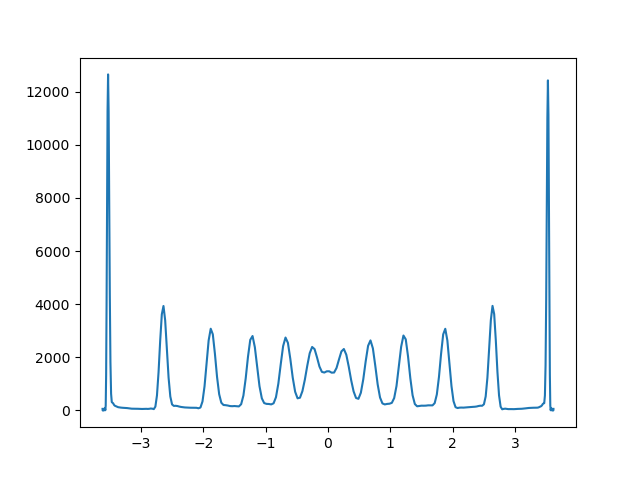

In [56]:
plt.figure()
plt.plot(energies,densities)
plt.show()

In [39]:
ham_mat=syst.qsystem.hamiltonian_submatrix(params=kparams)
ev=np.sort(sl.eigvals(ham_mat))

In [ ]:
Erange=np.linspace(-4,4,200)
dostest=np.zeros(len(Erange))

for idx, ee in enumerate(Erange):
    count=0
    for ene in ev:
        if np.abs(ene-ee)<0.02:
            count+=1
    dostest[idx]=count

In [63]:
len(ev)

7381

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning:

Casting complex values to real discards the imaginary part

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



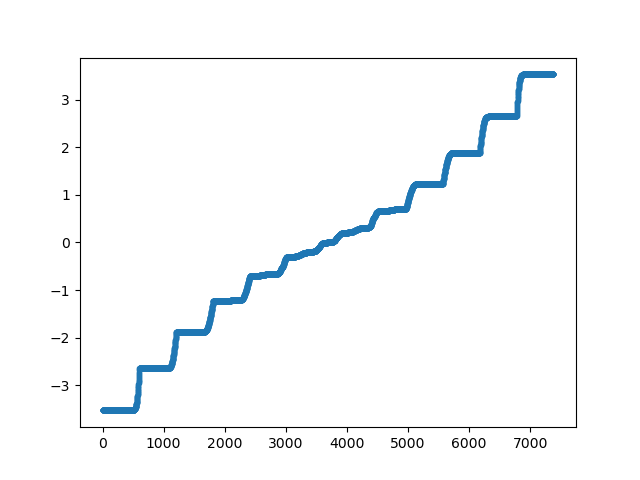

In [62]:
plt.figure()
#plt.imshow(np.imag(ham_mat))
plt.plot(ev,'.')
#plt.plot(Erange,dostest)
#plt.plot(energies,densities/np.sum(densities)*np.sum(dostest))
plt.show()

In [25]:
len(densities)

200

In [191]:
energy_subset = np.linspace(-1, 3)
density_subset = spectrum(energy_subset)

In [209]:
energy_subset2 = np.linspace(-1, 3)
density_subset2 = spectrum2(energy_subset2)

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning:

Casting complex values to real discards the imaginary part

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



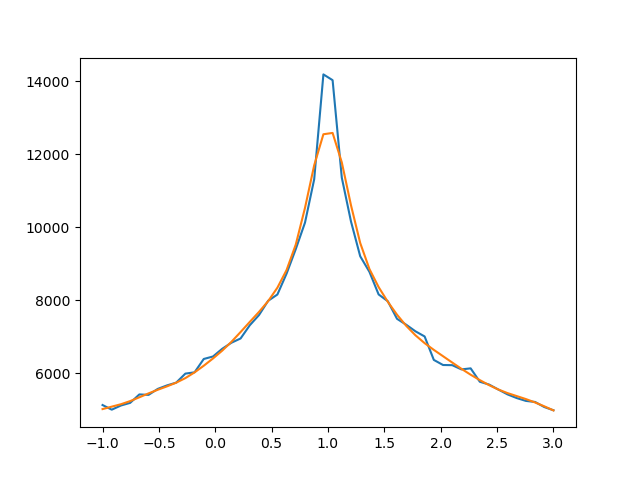

In [210]:
plt.figure()
plt.plot(energy_subset,density_subset)
plt.plot(energy_subset2,density_subset2)
plt.show()

In [33]:
stest=kwant.Builder()
lat=kwant.lattice.square(a=1,norbs=1)

In [5]:
sbox=[[-1.5/0.05, 1.5/0.05], [-3.0/0.05, 3.0/0.05]]

In [34]:
def onsite(site,Ufun):
    return Ufun(site)

In [35]:
def mag_hop(to_site,from_site,phi):
    x=from_site.tag[0]
    return np.exp(1j*2*np.pi*phi*x)

In [30]:
[np.exp(1j*2*np.pi*0.01*site.tag[0]) for site in stest.sites]

[(-0.30901699437494756-0.9510565162951535j),
 (-0.30901699437494756-0.9510565162951535j),
 (-0.30901699437494756-0.9510565162951535j),
 (-0.30901699437494756-0.9510565162951535j),
 (-0.30901699437494756-0.9510565162951535j),
 (-0.30901699437494756-0.9510565162951535j),
 (-0.30901699437494756-0.9510565162951535j),
 (-0.30901699437494756-0.9510565162951535j),
 (-0.30901699437494756-0.9510565162951535j),
 (-0.30901699437494756-0.9510565162951535j),
 (-0.30901699437494756-0.9510565162951535j),
 (-0.30901699437494756-0.9510565162951535j),
 (-0.30901699437494756-0.9510565162951535j),
 (-0.30901699437494756-0.9510565162951535j),
 (-0.30901699437494756-0.9510565162951535j),
 (-0.30901699437494756-0.9510565162951535j),
 (-0.30901699437494756-0.9510565162951535j),
 (-0.30901699437494756-0.9510565162951535j),
 (-0.30901699437494756-0.9510565162951535j),
 (-0.30901699437494756-0.9510565162951535j),
 (-0.30901699437494756-0.9510565162951535j),
 (-0.30901699437494756-0.9510565162951535j),
 (-0.30901

In [36]:
stest[lat.shape(qshape(sbox),(0,0))]=onsite
stest[lat.neighbors()]=mag_hop
stest=stest.finalized()

In [14]:
def Ufun(site):
    return 0

In [39]:
spectrum2=kwant.kpm.SpectralDensity(stest,params={'Ufun':Ufun,'phi':0.01},energy_resolution=0.1)

In [40]:
energies,densities=spectrum2()

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning:

Casting complex values to real discards the imaginary part

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



<function matplotlib.pyplot.show(block=None)>

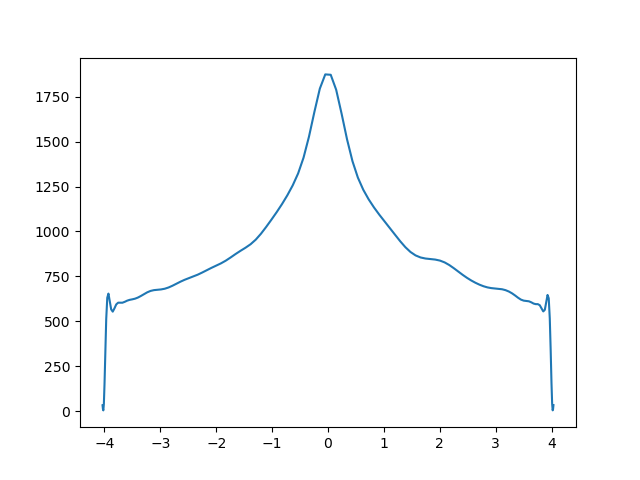

In [41]:
plt.figure()
plt.plot(energies,densities)
plt.show

In [18]:
import scipy.linalg as sl

In [1]:
ham_mat=stest.hamiltonian_submatrix(params={'Ufun':Ufun,'phi':0.1})
#ev=np.sort(sl.eigvals(ham_mat))

NameError: name 'stest' is not defined

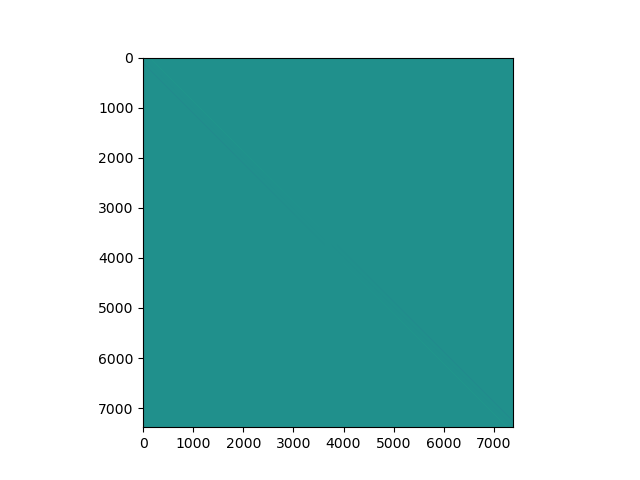

In [44]:
plt.figure()
plt.imshow(np.imag(ham_mat))
#plt.plot(ev)
plt.show()

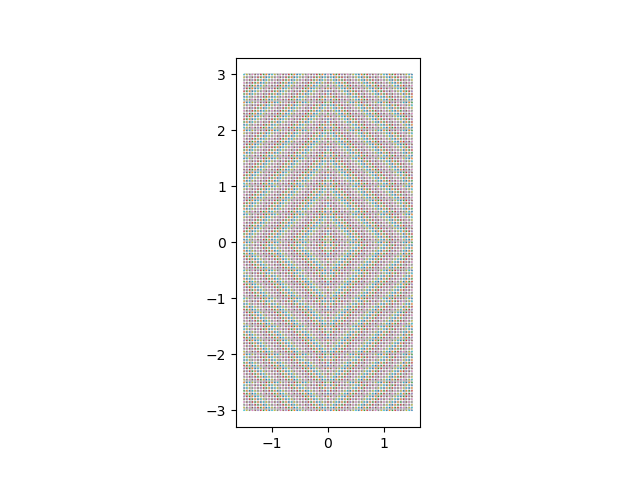

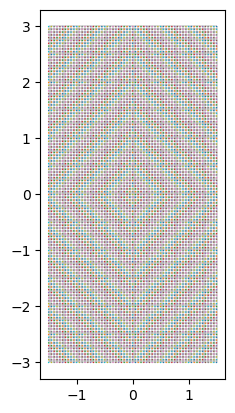

In [6]:
kwant.plot(syst.qsystem)

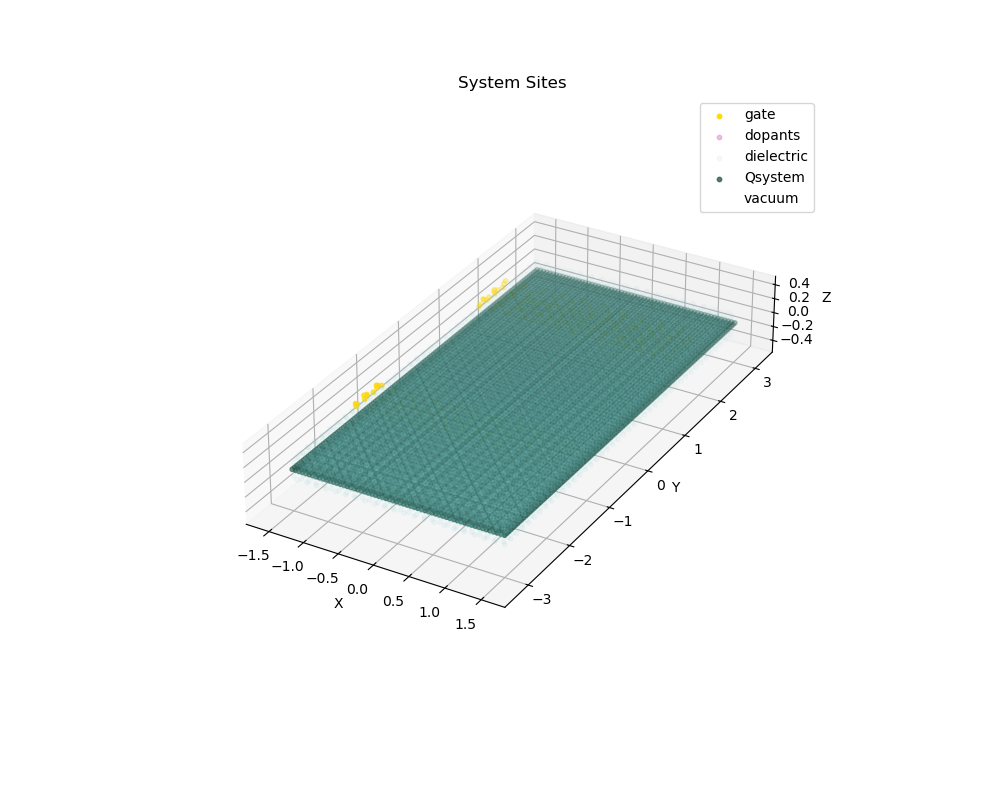

In [7]:
syst.plot_geometry()

In [ ]:
syst.export_sites("sites.json")

In [54]:
import json

In [55]:
with open("setup/updated_sites.json", "r") as f:
    updated_data = json.load(f)

In [56]:
len(updated_data)

300137

In [19]:
import pyvista as pv
import numpy as np

def plot_voronoi_3d(vor):
    plotter = pv.Plotter()
    # The 3D Voronoi object contains regions that might not be closed.
    # Here we attempt to create surfaces from the finite regions.
    for region in vor.regions:
        if not region or -1 in region:
            continue
        # Create a PolyData object from the region vertices.
        region_points = vor.vertices[region]
        try:
            # Use Delaunay triangulation to form a surface.
            poly = pv.PolyData(region_points)
            surface = poly.delaunay_3d(alpha=1.0)
            if surface.n_cells > 0:
                plotter.add_mesh(surface, opacity=0.5, show_edges=True)
        except Exception as e:
            print("Failed to create a surface for a region:", e)
    
    # Add the original points for reference.
    plotter.add_points(vor.points, color="red", point_size=10)
    plotter.show()

# Example usage:
# vor = geometry3d.compute_voronoi()  # assuming geometry3d is an instance of your Geometry3D class.
# plot_voronoi_3d(vor)

In [ ]:
vor = geom3d.compute_voronoi()  # assuming geometry3d is an instance of your Geometry3D class.
plot_voronoi_3d(vor)

In [8]:
import pyvista as pv
pv.set_jupyter_backend('trame')

In [16]:
def polygon_area(vertices):
    """
    Compute the area of a planar convex polygon in 3D.
    
    This function triangulates the polygon using the first vertex as a reference.
    
    Parameters:
    - vertices: np.ndarray of shape (N,3) representing the polygon vertices in order.
    
    Returns:
    - area: float, the computed area of the polygon.
    """
    if len(vertices) < 3:
        return 0.0
    v0 = vertices[0]
    area = 0.0
    for i in range(1, len(vertices) - 1):
        v1 = vertices[i]
        v2 = vertices[i + 1]
        triangle_area = 0.5 * np.linalg.norm(np.cross(v1 - v0, v2 - v0))
        area += triangle_area
    return area

In [17]:

def create_sites_from_geometry_3d(geometry3d):
    """
    Create Site objects from a Geometry3D instance.
    
    This function assumes that geometry3d.points is an array of shape (N, 3) and that
    geometry3d.compute_voronoi() has been called to obtain a 3D Voronoi tessellation.
    It then builds a dictionary of Site objects and populates neighbor relationships
    based on the Voronoi ridges.
    
    Parameters:
    - geometry3d: an instance of your Geometry3D class.
    
    Returns:
    - sites: dict mapping site IDs to Site objects.
    """
    # Get the points and the 3D Voronoi object.
    points = geometry3d.points  # shape (N, 3)
    vor = geometry3d.compute_voronoi()
    
    sites = {}
    num_points = len(points)
    for i in range(num_points):
        # Initialize each site with default values (modify as needed).
        sites[i] = Site(site_id=i, coordinates=points[i], charge=0.0, potential=0.0, dielectric_constant=1.0)
    
    # Use vor.ridge_points and vor.ridge_vertices to assign neighbor relationships.
    # Each ridge corresponds to a common face between two Voronoi cells.
    for ridge, ridge_vertices in zip(vor.ridge_points, vor.ridge_vertices):
        i, j = ridge
        # Skip infinite ridges (if any vertex is -1, it means the ridge is unbounded).
        if -1 in ridge_vertices:
            continue
        # Extract the vertices of the common face.
        face_vertices = vor.vertices[ridge_vertices]
        # Compute the area of the face.
        face_area = polygon_area(face_vertices)
        # Compute the distance between the two sites.
        distance = np.linalg.norm(sites[i].coordinates - sites[j].coordinates)
        # Add neighbor relationship for both sites.
        sites[i].add_neighbor(j, face_area)
        sites[j].add_neighbor(i, face_area)
    
    return sites

In [35]:
list(sites_dict.values())[1].neighbors

{5: 1.1805726928466331,
 10: 0.23232292003798374,
 4: 12.123026442523273,
 21: 38.32674936246214,
 28: 5.210133426222529,
 27: 2.482664655616283}

In [42]:
from pymumps import DMumpsContext

ModuleNotFoundError: No module named 'pymumps'